In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

<AxesSubplot:>

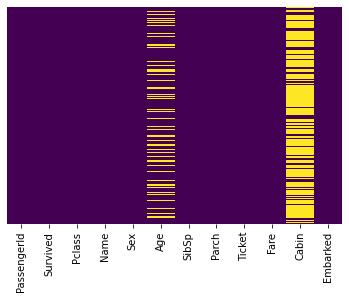

In [5]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

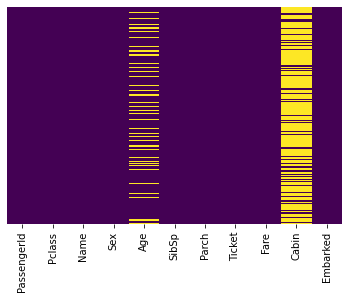

In [6]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#START CLEANING
#delete Cabin column because there are too many missing values
train_data.drop('Cabin', inplace=True, axis=1)
test_data.drop('Cabin', inplace=True, axis=1)

In [10]:
#delete Name column because it is considered not related to the result
train_data.drop('Name', inplace=True, axis=1)
test_data.drop('Name', inplace=True, axis=1)

In [11]:
#delete Ticket column because it is considered not related to the result
train_data.drop('Ticket', inplace=True, axis=1)
test_data.drop('Ticket', inplace=True, axis=1)

In [12]:
#Fill the empty data of Age column with the average value
test_data.Age.fillna(test_data.Age.mean(), inplace=True)
train_data.Age.fillna(train_data.Age.mean(), inplace=True)

In [13]:
#Fill the missing Embarked value with the most common value
train_data.Embarked.fillna(train_data.Embarked.value_counts().index[0],inplace=True)

In [14]:
#Fill the missing Fare value with the average of other non missing values
test_data.Fare.fillna(train_data.Fare.mean(), inplace=True)

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [16]:
train_data['Sex'] = pd.get_dummies(data=train_data['Sex'], drop_first=True)
train_data.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    1  22.0      1      0   7.2500        S
1            2         1       1    0  38.0      1      0  71.2833        C
2            3         1       3    0  26.0      0      0   7.9250        S
3            4         1       1    0  35.0      1      0  53.1000        S
4            5         0       3    1  35.0      0      0   8.0500        S

In [17]:
train_data[['Embarked_C','Embarked_Q','Embarked_S']] = pd.get_dummies(data=train_data['Embarked'], prefix='Embarked')
train_data.drop('Embarked', axis=1, inplace=True)
train_data.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    1  22.0      1      0   7.2500   
1            2         1       1    0  38.0      1      0  71.2833   
2            3         1       3    0  26.0      0      0   7.9250   
3            4         1       1    0  35.0      1      0  53.1000   
4            5         0       3    1  35.0      0      0   8.0500   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  
3           0           0           1  
4           0           0           1

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    uint8  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked_C   891 non-null    uint8  
 9   Embarked_Q   891 non-null    uint8  
 10  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(4)
memory usage: 52.3 KB


In [27]:
test_data['Sex'] = pd.get_dummies(data=test_data['Sex'], drop_first=True)
test_data.head()

PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0          892       3    1  34.5      0      0   7.8292        Q
1          893       3    0  47.0      1      0   7.0000        S
2          894       2    1  62.0      0      0   9.6875        Q
3          895       3    1  27.0      0      0   8.6625        S
4          896       3    0  22.0      1      1  12.2875        S

In [28]:
test_data[['Embarked_C','Embarked_Q','Embarked_S']] = pd.get_dummies(data=test_data['Embarked'], prefix='Embarked')
test_data.drop('Embarked', axis=1, inplace=True)
test_data.head()

PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  \
0          892       3    1  34.5      0      0   7.8292           0   
1          893       3    0  47.0      1      0   7.0000           0   
2          894       2    1  62.0      0      0   9.6875           0   
3          895       3    1  27.0      0      0   8.6625           0   
4          896       3    0  22.0      1      1  12.2875           0   

   Embarked_Q  Embarked_S  
0           1           0  
1           0           1  
2           1           0  
3           0           1  
4           0           1

In [19]:
#TRAINING
y = train_data['Survived']
X = train_data.drop('Survived',axis=1)

In [20]:
X.head()

PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  \
0            1       3    1  22.0      1      0   7.2500           0   
1            2       1    0  38.0      1      0  71.2833           1   
2            3       3    0  26.0      0      0   7.9250           0   
3            4       1    0  35.0      1      0  53.1000           0   
4            5       3    1  35.0      0      0   8.0500           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1

In [21]:
type(X)

pandas.core.frame.DataFrame

In [22]:
random_forest = RandomForestClassifier(n_estimators=100)

In [23]:
random_forest.fit(X, y)

RandomForestClassifier()

In [30]:
test_prediction = random_forest.predict(test_data)

In [33]:
submission = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': test_prediction})

In [37]:
submission.Survived.value_counts()

0    283
1    135
Name: Survived, dtype: int64

In [38]:
submission.to_csv('submission.csv', index=False)